In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: True


In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [18]:
!head -n5 {train_dataset_fp}
!wc -l {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
121 /root/.keras/datasets/iris_training.csv


In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [25]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=28192, shape=(32,), dtype=float32, numpy=
              array([5. , 4.9, 4.7, 5.1, 6.5, 6.7, 6.4, 6.9, 6.9, 5.2, 6.4, 4.7, 4.8,
                     6.7, 5.8, 7.7, 5.7, 6.8, 5.8, 6. , 5.2, 4.8, 6.1, 5.7, 5. , 6. ,
                     4.4, 6.8, 5.4, 5. , 6.6, 5.4], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=28193, shape=(32,), dtype=float32, numpy=
              array([3.2, 3.1, 3.2, 3.8, 3.2, 3. , 3.2, 3.1, 3.1, 3.4, 3.2, 3.2, 3. ,
                     3.3, 2.7, 3.8, 2.8, 3.2, 2.7, 3. , 2.7, 3.1, 2.8, 3.8, 3.4, 2.2,
                     2.9, 2.8, 3.4, 3. , 2.9, 3.9], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=28190, shape=(32,), dtype=float32, numpy=
              array([1.2, 1.5, 1.6, 1.5, 5.1, 5.2, 4.5, 4.9, 5.1, 1.4, 5.3, 1.3, 1.4,
                     5.7, 5.1, 6.7, 4.5, 5.9, 5.1, 4.8, 3.9, 1.6, 4. , 1.7, 1.6, 5. ,
                     1.4, 4.8, 1.5, 1.6, 4

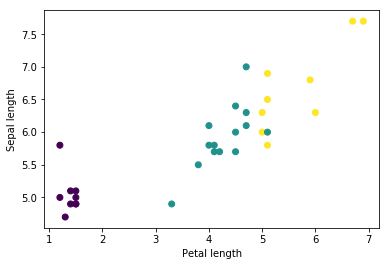

In [7]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [0]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels
train_dataset = train_dataset.map(pack_features_vector)

In [29]:
features, labels = next(iter(train_dataset))

print(features[:5])
print(tf.one_hot(labels[:5], 3, dtype='float32'))

tf.Tensor(
[[5.  3.2 1.2 0.2]
 [4.9 3.1 1.5 0.1]
 [4.7 3.2 1.6 0.2]
 [5.1 3.8 1.5 0.3]
 [6.5 3.2 5.1 2. ]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(5, 3), dtype=float32)


In [30]:
class Model(object):
  def __init__(self, num_hidden=3, num_output=3, num_inputs=4):
    self.b1 = tf.Variable(tf.random.normal(
                  (1, num_hidden),
                  mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.normal(
                  (num_inputs, num_hidden),
                   mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.normal(
                  (1, num_output),
                  mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.normal(
                  (num_hidden, num_output),
                   mean=0.0,
                  stddev=1.0,
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  def __call__(self, x):
    return self.forward(x)

  def forward(self, x):
    a1 = tf.sigmoid(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    a2 = tf.nn.softmax(
          tf.linalg.matmul(a1, self.W2) + self.b2
          )
    return a2

model = Model()
model(features[:5])

<tf.Tensor: id=28368, shape=(5, 3), dtype=float32, numpy=
array([[0.13765976, 0.05198822, 0.810352  ],
       [0.13766102, 0.05198886, 0.8103501 ],
       [0.13726467, 0.05176727, 0.81096804],
       [0.13638625, 0.0512777 , 0.8123361 ],
       [0.1354088 , 0.05073471, 0.81385654]], dtype=float32)>

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

def train_step(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [model.W1, model.W2, model.b1, model.b2])
  
  model.W1.assign_sub(learning_rate * dW1)
  model.W2.assign_sub(learning_rate * dW2)
  model.b1.assign_sub(learning_rate * db1)
  model.b2.assign_sub(learning_rate * db2)

train_step(model, features, tf.one_hot(labels, 3, dtype='float32'), 0.01)

In [37]:
model = Model()
learning_rate = 0.1

for epoch in range(100):
  for inputs, outputs in iter(train_dataset):
    outputs = tf.one_hot(outputs, 3, dtype='float32')
    train_step(model, inputs, outputs, learning_rate)
    
  current_loss = tf.reduce_mean([loss(model(x), tf.one_hot(y, 3, dtype='float32')) for x, y in iter(train_dataset)])
  current_loss = loss(model(inputs), outputs).numpy()
  
  print(f'The loss value for epoch {epoch} is {current_loss:0.2f}')

The loss value for epoch 0 is 0.25
The loss value for epoch 1 is 0.25
The loss value for epoch 2 is 0.25
The loss value for epoch 3 is 0.25
The loss value for epoch 4 is 0.24
The loss value for epoch 5 is 0.24
The loss value for epoch 6 is 0.24
The loss value for epoch 7 is 0.24
The loss value for epoch 8 is 0.24
The loss value for epoch 9 is 0.24
The loss value for epoch 10 is 0.24
The loss value for epoch 11 is 0.24
The loss value for epoch 12 is 0.24
The loss value for epoch 13 is 0.23
The loss value for epoch 14 is 0.23
The loss value for epoch 15 is 0.23
The loss value for epoch 16 is 0.23
The loss value for epoch 17 is 0.23
The loss value for epoch 18 is 0.23
The loss value for epoch 19 is 0.23
The loss value for epoch 20 is 0.23
The loss value for epoch 21 is 0.23
The loss value for epoch 22 is 0.23
The loss value for epoch 23 is 0.23
The loss value for epoch 24 is 0.22
The loss value for epoch 25 is 0.22
The loss value for epoch 26 is 0.22
The loss value for epoch 27 is 0.22
Th

TypeError: ignored